In [1]:
from glob import glob
import numpy as np
import os
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt

In [551]:
source = 'logdir/muw_push/p2e_online_mtlatcog/episodes'
source = 'logdir/muw_push/p2e_online_mtcemg/episodes'
source = 'logdir/muw_push/p2e_online_mtgdg/episodes'
li = sorted(glob(f'{source}/*.npz'))

In [552]:
len(li)

9364

In [553]:
ep = li[1]
data = np.load(li[1])

In [554]:
list(data.keys())

['observation',
 'state_observation',
 'desired_goal',
 'state_desired_goal',
 'achieved_goal',
 'state_achieved_goal',
 'puck_pos',
 'hand_pos',
 'image_observation',
 'image_desired_goal',
 'image_achieved_goal',
 'image',
 'state',
 'goal',
 'image_goal',
 'action',
 'reward',
 'discount']

## Plot example trajectories

In [284]:
x_min, x_max, y_min, y_max = -0.2, 0.2, 0.4, 0.8
def plot_map():
#     x_min, x_max, y_min, y_max = -1, 1, -1, 1
    plt.plot([x_min, x_min, x_max, x_max, x_min,], [y_min, y_max, y_max, y_min, y_min], color='black', lw=5)

def make_figure_pretty(ax, fig):
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.grid(False)
    plt.axis('off')
    fig.tight_layout()  
    
def get_figure():
#     fig = plt.figure(figsize=(18,18))
    fig = plt.figure(figsize=(4,4))
    ax = plt.gca()
    plt.clf()  # Clear figure
    cmap = plt.get_cmap()
    return fig, ax, cmap

def plot_traj(data, cmap=None, **kwargs):   
    colors = np.linspace(1, 0, len(data))
    cmap = plt.get_cmap(cmap)
    for i in range(data.shape[0]):
        plt.plot(data[i:i+2, 0], data[i:i+2, 1], color=cmap(colors[i]), **kwargs)

(2,)

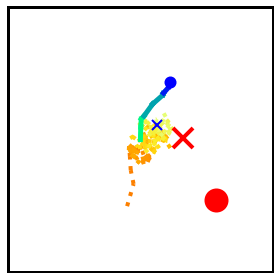

In [656]:
# i = -1
i = i - 1
data = np.load(li[i])


puck = data['puck_pos']
hand = data['hand_pos']
puck_goal = data['goal'][0, 2:]
hand_goal = data['goal'][0, :2]


fig, ax, cmap = get_figure()
plot_map()    
# plt.plot(hand[:, 1], hand[:, 0], marker='o', color=cmap(colors[0]))
# plt.plot(puck[:, 1], puck[:, 0], marker='o', color=cmap(colors[-1]))
plot_traj(hand, lw=4, linestyle=':', cmap='Wistia')
plot_traj(puck, ms=10, lw=5, cmap='winter')
# Hand goal
plt.plot(hand_goal[0], hand_goal[1], 'rx', mew=4, ms=20)
plt.plot(hand[-1, 0], hand[-1, 1], 'bx', mew=2, ms=10)
# Puck goal
plt.plot(puck_goal[0], puck_goal[1], 'ro', mew=4, ms=20)
plt.plot(puck[-1, 0], puck[-1, 1], 'bo', mew=2, ms=10)
make_figure_pretty(ax, fig)
fig.show()

In [653]:
# TODO why does the reward not correspond to the env reward?
# data['reward'] == (-(puck - puck_goal) ** 2 - (hand - hand_goal) ** 2).sum(1)
# data['reward'] == -np.linalg.norm(data['state_achieved_goal'] - data['state_desired_goal'], axis=1)
# -np.sqrt(((puck - puck_goal[None]) ** 2 + (hand - hand_goal[None]) ** 2).sum(1)) == -np.linalg.norm(data['state_achieved_goal'] - data['state_desired_goal'], axis=1)

In [595]:
# -np.sqrt(((puck - puck_goal[None]) ** 2 + (hand - hand_goal[None]) ** 2).sum(1)), data['reward']
# -np.linalg.norm(data['state_achieved_goal'] - data['state_desired_goal'], axis=1)
# -np.linalg.norm(puck - puck_goal[None], axis=1) - np.linalg.norm(hand - hand_goal[None], axis=1)

In [597]:
# data['state_achieved_goal'][0], hand[0], puck[0]
# data['state_desired_goal'][0], hand_goal, puck_goal

## Plot 2d histogram of improvements

In [527]:
# i = 1000
# i = i + 1
# Start from 8500 - before goes plan2expore
# episodes = [np.load(ep) for ep in li[8100:]]
# pucks = np.array([ep['puck_pos'] for ep in episodes])
# hands = np.array([ep['hand_pos'] for ep in episodes])
# goals = np.array([ep['goal'] for ep in episodes])
# puck_goals = goals[:, 0, 2:]
# hand_goals = goals[:, 0, :2]


In [2]:
from multiprocessing.pool import ThreadPool
tp = ThreadPool(10)

idx = 3700
source = 'logdir/muw_push/p2ear1_online_mtlatcog/episodes'
li = sorted(glob(f'{source}/*.npz'))
episodes_latco = list(tp.imap(lambda x: dict(np.load(x)), li[idx:]))

source = 'logdir/muw_push/p2ear1_online_mtcemg/episodes'
li = sorted(glob(f'{source}/*.npz'))
episodes_cem = list(tp.imap(lambda x: dict(np.load(x)), li[idx:]))

source = 'logdir/muw_push/p2ear1_online_mtgdg/episodes'
li = sorted(glob(f'{source}/*.npz'))
episodes_gd = list(tp.imap(lambda x: dict(np.load(x)), li[idx:]))

In [93]:
episodes = episodes_latco
# episodes = episodes_cem
# episodes = episodes_gd

pucks = np.array([ep['puck_pos'] for ep in episodes])
hands = np.array([ep['hand_pos'] for ep in episodes])
goals = np.array([ep['goal'] for ep in episodes])
puck_goals = goals[:, 0, 2:]
hand_goals = goals[:, 0, :2]

In [94]:
# Use to plot hands instead of pucks
# puck_goals = hand_goals
# pucks = hands

In [95]:
# # Test where the new data starts
# source = 'logdir/muw_push/p2ear1_online_mtlatcog/episodes'
# li = sorted(glob(f'{source}/*.npz'))
# print(len(li))
# i = 3700 # here all methods already work well (3086 is the first collected episode)
# print(np.load(li[i])['state'].shape)


# source = 'logdir/muw_push/p2e_online_mtcemg/episodes'
# li = sorted(glob(f'{source}/*.npz'))
# print(np.load(li[i])['state'][-1])

1

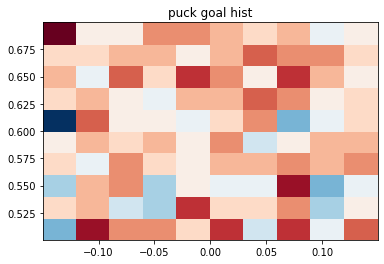

In [96]:
# puck_goals.shape
bins = 10
h, x_bins, y_bins, _ = plt.hist2d(puck_goals[:, 0], puck_goals[:, 1], bins=bins)
# plt.hist2d(pucks[..., 0].flatten(), pucks[..., 1].flatten(), bins=20)
plt.title('puck goal hist')

# x_bins_latco = x_bins
# y_bins_latco = y_bins

# h, x_bins, y_bins, _ = plt.hist2d(pucks[:, 0, 0], pucks[:, 0, 1], bins=bins)
# # plt.hist2d(pucks[..., 0].flatten(), pucks[..., 1].flatten(), bins=20)
# plt.title('puck init hist')
1

1

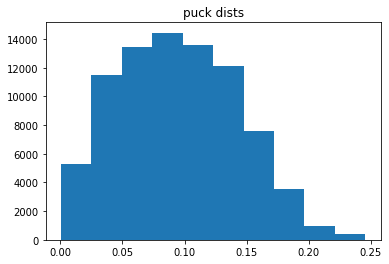

In [97]:
puck_dists = np.linalg.norm(pucks - puck_goals[:, None], axis=2)
plt.hist(puck_dists.flatten())
plt.title('puck dists')
1

1

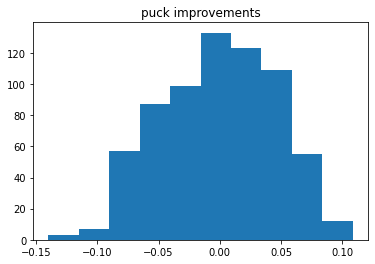

In [98]:
puck_first_dists = np.linalg.norm(pucks[:, 0] - puck_goals, axis=1)
puck_last_dists = np.linalg.norm(pucks[:, -1] - puck_goals, axis=1)
puck_improvements = puck_first_dists - puck_last_dists
plt.hist(puck_improvements.flatten())
plt.title('puck improvements')

1

In [99]:
# TODO plot success and improvement in success and compare it
puck_first_dists = np.linalg.norm(pucks[:, 0] - puck_goals, axis=1)
puck_last_dists = np.linalg.norm(pucks[:, -1] - puck_goals, axis=1)
puck_improvements = puck_first_dists - puck_last_dists
# plt.hist(puck_improvements.flatten())
# plt.title('puck success')

eps = 0.04 # decent threshold
# for eps in np.linspace(0.1, 0.005):
#     puck_first_success = (puck_first_dists < eps).mean()
#     puck_last_success = (puck_last_dists < eps).mean()
#     
#     print(f'{eps:.3f}', f'{puck_last_success - puck_first_success:.3f}')

puck_first_success = (puck_first_dists < eps).astype(np.float)
puck_last_success = (puck_last_dists < eps).astype(np.float)
puck_improvement_success = puck_last_success - puck_first_success
# puck_first_success, puck_last_success, puck_last_success - puck_first_success

/nfs/kun1/users/oleg/anaconda3_nfs/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


1

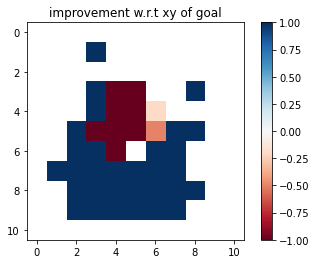

In [100]:
hist_data = puck_last_dists
hist_data = puck_first_dists
# hist_data = puck_dists.mean(1)
hist_data = puck_improvements
hist_data = puck_improvement_success
# hist_data = puck_goals[:, 0]

x_idx = np.digitize(puck_goals[:, 0], x_bins_latco)
y_idx = np.digitize(puck_goals[:, 1], y_bins_latco)
# plt.hist2d(puck_goals[:, 0], puck_goals[:, 1], bins=50, weights=puck_dists.mean(1))
1
h = np.zeros((bins+1, bins+1, hist_data.shape[0]))
# h[:] = np.inf
h[x_idx - 1, y_idx - 1, range(hist_data.shape[0])] = hist_data
h = h.sum(-1) / np.count_nonzero(h, -1)
h[h==0] = np.nan
# h = h > 0
plt.set_cmap('RdBu')
plt.imshow(h.T)
plt.colorbar()
plt.title('improvement w.r.t xy of goal')
1
# h[]
# puck_goals.shape
# puck_last_dists.shape


In [91]:
# puck_improvements.mean()
# puck_improvement_success
# puck_goals.shape

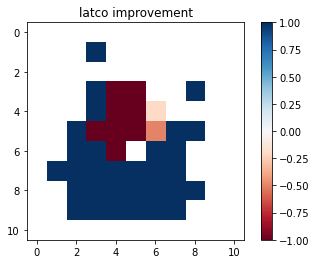

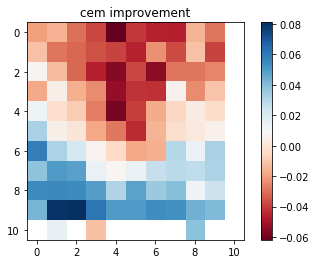

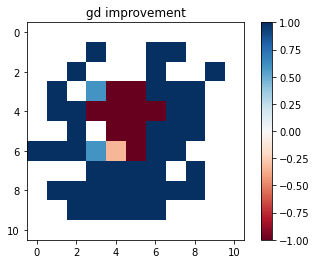

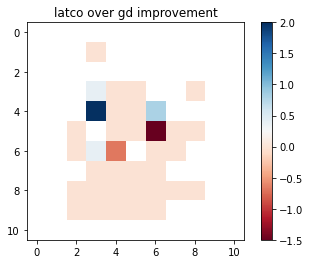

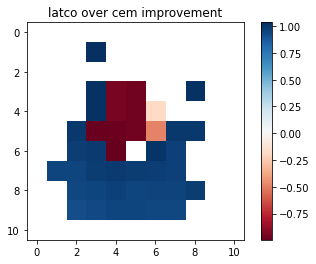

In [102]:
# h_cem = h
# h_gd = h
h_latco = h
# h_gd_orig = h

# plt.imshow(h - h_gd)
# plt.imshow(h)
plt.imshow(h_latco.T)
plt.title('latco improvement')
plt.colorbar()
plt.show()
plt.imshow(h_cem.T)
plt.title('cem improvement')
plt.colorbar()
plt.show()
# plt.imshow(h_gd_orig)
plt.imshow(h_gd.T)
plt.title('gd improvement')
plt.colorbar()
plt.show()
plt.imshow((h_latco - h_gd).T)
plt.title('latco over gd improvement')
plt.colorbar()
plt.show()
plt.imshow((h_latco - h_cem).T)
plt.title('latco over cem improvement')
plt.colorbar()
plt.show()
# plt.imshow((h_latco - h_cem).T)
# plt.imshow((h_gd - h_cem).T)

In [46]:
print(np.nanmean(h_latco), np.nanmean(h_cem), np.nanmean(h_gd))
print(np.nanmean(h_latco - h_gd), np.nanmean(h_latco - h_cem))

0.0008365135739509329 0.0007392671292641472 0.0024207403880871984
-0.0019667959425771074 -0.00022957247829259427


## Reward field

In [3]:
# Create environment.
env = make_env(config)

# Create visualization environment
suite, task = config.task.split('_', 1)
vis_env = wrappers.MetaWorldVis(task, config.action_repeat, width=64)

# Create and load agent.
actspace = env.action_space
datadir = config.logdir / 'episodes'
agent = DreamerColloc(config, datadir, actspace)
agent.load(config.logdir / 'variables.pkl')

/nfs/kun1/users/oleg/anaconda3_nfs/envs/tf2/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Found 5296420 model parameters.
Found 576808 actor parameters.
Found 413601 value parameters.


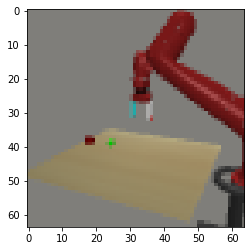

In [4]:
state = np.array([0., 0., 0.02, 0., 0., 0.02, 0, 0, 0])
state = np.array([0.1, 0.6, 0.25, 0.0, 0.25, 0.0, -0.0, 0.0, -0.0])
state[:3] += np.array([0.0, 0.0, 0.0]) # xyz Sawyer
state[3:6] += np.array([0.1, 0.7, 0.0]) # xyz object
# Table is [-.35, .35], [.25, .95]
frame = vis_env.render_states(state[None])
# np.save(config.logdir_colloc / 'background.npy', frame[0])
feat = agent.get_init_feat({'image': frame, 'reward': np.zeros(1)})[0]
r = agent._reward(feat).mode()
plt.imshow(frame[0])
plt.show()

In [76]:
def get_r(x, y):
    state = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0])
    state[:3] += np.array([x, y, 0.0]) # xyz Sawyer
#     state[:3] += np.array([0.1, 0.6, 0.0]) # Sawyer in neutral position
    state[3:6] += np.array([x, y, 0.0]) # xyz object
    # Table is [-.35, .35], [.25, .95]
    frame = vis_env.render_states(state[None])
    
    feat = agent.get_init_feat({'image': frame, 'reward': np.zeros(1)})[0]
    r = agent._reward(feat).mode()
    return r

n = 30
reward_map = np.zeros((n,n))
for i, x in enumerate(np.linspace(-.35, .35, n)):
    for j, y in enumerate(np.linspace(.25, .95, n)):
        r = get_r(x,y)
        reward_map[i,j] = r

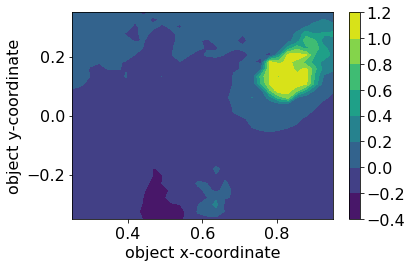

In [127]:
x, y = np.meshgrid(np.linspace(.25, .95, n),
                   np.linspace(-.35, .35, n))

cmap = plt.get_cmap()
# plt.contourf(y_map, x_map, reward_map, 100, cmap=cmap)
fig = plt.figure()
matplotlib.rcParams.update({'font.size': 16})
plt.contourf(x, y, reward_map, cmap=cmap)
# plt.imshow(reward_map)
# plt.contourf(y_map, x_map, reward_map, cmap=cmap)
# plt.contourf(reward_map)
# plt.pcolormesh(reward_map)
plt.colorbar()
fig.show()
plt.xlabel('object x-coordinate')
plt.ylabel('object y-coordinate')
plt.tight_layout()
fig.savefig("reward_field.png", dpi=300)